In [1]:
from logicqubit.logic import *
from cmath import *
import numpy as np
import sympy as sp
from scipy.linalg import expm, sinm, cosm, logm, sqrtm
from qiskit.quantum_info.synthesis import euler_angles_1q 

logicqubit-gpu version 1.5.3


In [2]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr): # transformada quântica de Fourier inversa
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)

In [4]:
D = np.matrix('0 0; 0 5.105088062083414')
P = np.matrix('1 0; 0 1')/sqrt(2)

H = P*D*P.I
H_ad = H.getH()

X = np.matrix([[0, 1],[1, 0]]) 
Y = np.matrix([[0, -1j],[1j, 0]]) 
Z = np.matrix([[1, 0],[0, -1]]) 

#H = Y;
#H = np.matrix([[1.5, 0.5],[0.5 , 1.5]])
U = np.matrix(expm(1j*H))
print(U)

[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.38268343-0.92387953j]]


In [5]:
H_ad==H

matrix([[ True,  True],
        [ True,  True]])

In [6]:
H=-1j*logm(U)
print(H)

[[ 0.        -0.0000000e+00j  0.        +0.0000000e+00j]
 [ 0.        -0.0000000e+00j -1.17809725+3.0054075e-17j]]


In [7]:
h_eigenvalue = np.linalg.eigh(H)
eigenvalue = np.linalg.eig(U)
print(h_eigenvalue, eigenvalue)

(array([-1.17809725,  0.        ]), array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])) (array([1.        +0.j        , 0.38268343-0.92387953j]), matrix([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]))


In [8]:
exp(1j*h_eigenvalue[0][1])

(1+0j)

In [9]:
H,U

(array([[ 0.        -0.0000000e+00j,  0.        +0.0000000e+00j],
        [ 0.        -0.0000000e+00j, -1.17809725+3.0054075e-17j]]),
 matrix([[1.        +0.j        , 0.        +0.j        ],
         [0.        +0.j        , 0.38268343-0.92387953j]]))

In [10]:
theta = 0
phi = 0
lamb = 0

#m_90 = sqrtm(U)
#alpha = 14.0*pi/8.0
#U=np.matrix([[exp(1j*alpha), 0],[0 , exp(-1j*alpha)]])
theta,phi,lamb = euler_angles_1q(U)    

#lamb = phase = 14.0*pi/8.0
print(theta,phi,lamb)

0.0 -0.5890486225480862 -0.5890486225480862


In [11]:
logicQuBit  = LogicQuBit(7)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()
x4 = Qubit()

y = Qubit()

x1.H()
x2.H()
x3.H()
x4.H()

y.X()
y.H()

y.CU3(x4, theta, phi, lamb)
#y.PrintLastOperator()
y.CU3(x3, theta, phi, lamb)
y.CU3(x3, theta, phi, lamb)

y.CU3(x2, theta, phi, lamb)
y.CU3(x2, theta, phi, lamb)
y.CU3(x2, theta, phi, lamb)
y.CU3(x2, theta, phi, lamb)

y.CU3(x1, theta, phi, lamb)
y.CU3(x1, theta, phi, lamb)
y.CU3(x1, theta, phi, lamb)
y.CU3(x1, theta, phi, lamb)
y.CU3(x1, theta, phi, lamb)
y.CU3(x1, theta, phi, lamb)
y.CU3(x1, theta, phi, lamb)
y.CU3(x1, theta, phi, lamb)

iqft([x1,x2,x3,x4])

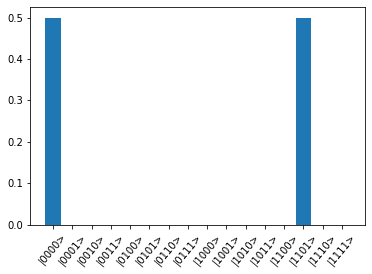

[0.4999999999999993, 4.444328245002933e-33, 9.458043121942754e-34, 1.2392664900382055e-33, 3.590942506967644e-34, 7.04069276098864e-33, 7.179820318365487e-34, 1.1068365625975586e-33, 1.90674662859329e-33, 1.4898264469620576e-33, 2.6065111262397497e-33, 3.5444528800133696e-33, 1.9631849440299357e-32, 0.4999999999999993, 9.492113202510472e-33, 5.763606665478879e-33]


In [12]:
res = logicQuBit.Measure([x1,x2,x3,x4])
logicQuBit.Plot()
print(res)

In [13]:
def Text2List(table):
    list = [int(i, base=2) for i in table]
    size = len(table[0])
    tmp = sorted(list, key=int, reverse=False)  # values in ascending order
    result = [[int(bin(j)[2:].zfill(size)[i]) for i in range(size)] for j in tmp]
    return result

def BinList(n):
    blist = []
    for i in iter(range(2 ** n)):
        b = bin(i)[2:].zfill(n)  # value in binary, ex: i=1, n=4 -> '0001'
        blist.append(b)
    return Text2List(blist)

size=4
blist = [value for i,value in enumerate(BinList(size)) if res[i]>0.3] 
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
print(results)

[0.0, 5.105088062083414]


In [171]:
# todos possíveis valores
size = 4
blist = [[i >> bl & 0x1 for bl in range(size)][::-1] for i in range(2**size)]
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
results

[0.0,
 0.39269908169872414,
 0.7853981633974483,
 1.1780972450961724,
 1.5707963267948966,
 1.9634954084936207,
 2.356194490192345,
 2.748893571891069,
 3.141592653589793,
 3.5342917352885173,
 3.9269908169872414,
 4.319689898685965,
 4.71238898038469,
 5.105088062083414,
 5.497787143782138,
 5.890486225480862]

In [127]:
def myU(theta, phi, _lambda):
    M = sp.Matrix([[exp(-1j*(phi+_lambda)/2)*cos(theta/2), -exp(-1j*(phi-_lambda)/2)*sin(theta/2)],
                    [exp(-1j*(phi-_lambda)/2)*sin(theta/2), exp(1j*(phi+_lambda))*cos(theta/2)]])
    return M

def my1U(theta, phi, _lambda):
    M = sp.Matrix([[cos(theta/2), -exp(1j*_lambda)*sin(theta/2)],
                [exp(1j*phi)*sin(theta/2), exp(1j*(phi+_lambda))*cos(theta/2)]])
    return M


In [128]:
H = np.matrix([[1.5, 0.5],[0.5 , 1.5]])
U = np.matrix(expm(1j*H))
print(U)

[[ 0.06207773+0.87538421j -0.47822457+0.03391322j]
 [-0.47822457+0.03391322j  0.06207773+0.87538421j]]


In [129]:
theta,phi,lamb = euler_angles_1q(U)  
print(theta,phi,lamb)

0.9999999999999999 1.5707963267948966 -1.5707963267948966


In [131]:
myU(theta, phi, lamb)

Matrix([
[                         0.877582561890373, -2.93563475640566e-17 + 0.479425538604203*I],
[2.93563475640566e-17 - 0.479425538604203*I,                           0.877582561890373]])

In [132]:
my1U(theta, phi, lamb)

Matrix([
[                         0.877582561890373, -2.93563475640566e-17 + 0.479425538604203*I],
[2.93563475640566e-17 + 0.479425538604203*I,                           0.877582561890373]])